# IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing the dataset
df = pd.read_csv('MultipleLinearRegression.csv')
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# extracting x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [7]:
# encoding the categorical column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [8]:
# splitting x and y into training and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
# create and train the mlr model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# predicting the output with the erros and r2_score
from sklearn.metrics import r2_score,mean_squared_error
y_pred = lr.predict(x_te)
r2 = r2_score(y_te,y_pred)
mse = mean_squared_error(y_te,y_pred)
print(mse)
print(r2)

83502864.03256583
0.9347068473282515


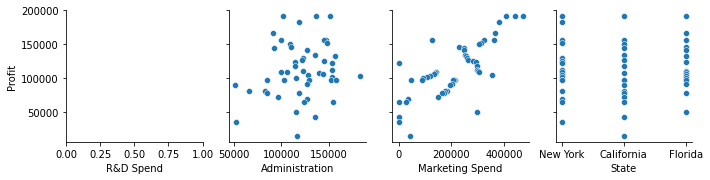

In [11]:
# since we have multiple columns we will be creating pairplots for them for 
# this we will be using seaborn library
# we provide the data frame as the input
sns.pairplot(df,x_vars=['R&D Spend','Administration','Marketing Spend','State'],
            y_vars=['Profit'])
plt.show()

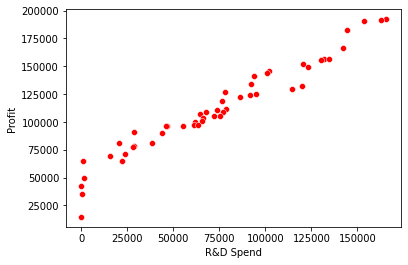

In [12]:
sns.scatterplot(data=df,x='R&D Spend',y='Profit',color='red')
plt.show()

# Backward Elimination

In [13]:
x_temp = x[:,1:]
const = np.ones((50,1))
x_temp = np.append(arr= const,values=x_temp,axis=1)
print(x_temp)

[[1.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 1.0 0.0 153441.51 101145.55 407934.54]
 [1.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 1.0 0.0 142107.34 91391.77 366168.42]
 [1.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 1.0 0.0 130298.13 145530.06 323876.68]
 [1.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 1.0 0.0 119943.24 156547.42 256512.92]
 [1.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 1.0 0.0 91749.16 114175.79 294919.57]
 [1.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [1.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 1.0 0.0 73994.56 122782.75 3

In [15]:
import statsmodels.api as sm
x_opt = np.array(x_temp[:,[0,1,2,3,4,5]],dtype=float)
# the significance level we are setting here is 5% or 0.05
stats = sm.OLS(endog=y,exog=x_opt).fit()
print(stats.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.34e-27
Time:                        16:42:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

In [16]:
x_opt = np.array(x_temp[:,[0,1,3,4,5]],dtype=float)
stats = sm.OLS(endog=y,exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           8.49e-29
Time:                        16:42:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.0

In [17]:
x_opt = np.array(x_temp[:,[0,3,4,5]],dtype=float)
stats = sm.OLS(endog=y,exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           4.53e-30
Time:                        16:43:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

In [18]:
x_opt = np.array(x_temp[:,[0,3,5]],dtype=float)
stats = sm.OLS(endog=y,exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           2.16e-31
Time:                        16:43:29   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [ ]:
x_opt = np.array(x_temp[:,[0,3]],dtype=float)
stats = sm.OLS(endog=y,exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.50e-32
Time:                        17:26:27   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [26]:
# splitting x_opt and y in the training set and the test set
xo_tr,xo_te,yo_tr,yo_te = train_test_split(x_opt,y,test_size=0.2,random_state=0)

In [25]:
lr_opt = LinearRegression()
lr_opt.fit(xo_tr,yo_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
yo_pred = lr_opt.predict(xo_te)
r2 = r2_score(yo_te,yo_pred)
mse = mean_squared_error(yo_te,yo_pred)
print(mse)
print(r2)

67220275.37568116
0.9474386447268489


In [27]:
%matplotlib notebook
from mpl_toolkits import mplot3d
# we create a 3d subplot on a matplot lib figure
a = plt.figure().add_subplot(projection='3d')
a.scatter3D(xo_te[:,0],xo_te[:,1],yo_te,c='red')
a.plot3D(xo_te[:,0],xo_te[:,1],yo_pred,c='blue')
plt.show()

<IPython.core.display.Javascript object>

# assignment
# try and automate the backward elimination process